In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# bring in csv files
food_security_hh = "data/data-EFK41.csv"
obesity_file = "data/data-xeuft.csv"
grand_food_security_file = "data/data-XVKxd.csv"

food_security_df = pd.read_csv(food_security_hh)
obesity_df = pd.read_csv(obesity_file)
grand_food_security_df = pd.read_csv(grand_food_security_file)

# Need to split the county/state to be able to merge then narrow the dataframes
# Splitting Columns - https://sparkbyexamples.com/pandas/pandas-split-column/#:~:text=the%20split()%20function%20is,Dataframe%20columns%2C%20whereas%20the%20Series.
# How to rename the column - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
food_security_df[['County', 'State']] = food_security_df.NAME_E.str.split(",", expand = True)
obesity_df[['County', 'State']] = obesity_df.Geography.str.split(",", expand = True)

# Rename the one column for easier manipulation
grand_food_security_df.rename(columns = {'County, State':'county_state'}, inplace = True)
grand_food_security_df[['County', 'State']] = grand_food_security_df.county_state.str.split(",", expand = True)

# Dropping all unneeded columns
food_security_df.drop(columns=['NAME_E'],inplace=True, axis=1)
obesity_df.drop(columns=['Column 1.1','Column 1.2','Column 1.3','Adult Obesity (2017)','Adult Obesity (2016)','Adult Obesity (2015)','Adult Obesity (2014)','Geography'],inplace=True, axis=1)
grand_food_security_df.drop(columns=['county_state'],inplace=True, axis=1)


# Isolating all Georgia information
georgia_food_security_df = food_security_df.loc[food_security_df['State']==' Georgia']
ga_obesity_df = obesity_df.loc[obesity_df['State']==' GA']
georgia_grand_food_security_df = grand_food_security_df.loc[grand_food_security_df['State']==' Georgia']

# Replacing Georgia with GA for merging purposes
ga_food_security_df=georgia_food_security_df.replace(' Georgia',' GA')
ga_grand_food_security_df=georgia_grand_food_security_df.replace(' Georgia',' GA')

# ga_obesity_df
# ga_food_security_df
# ga_grand_food_security_df



#Merging the dfs one by one
ga_food_security_complete = pd.merge(ga_food_security_df, ga_grand_food_security_df, how = "inner", on=["State", "County"])
#ga_food_security_complete.head()

In [3]:
# Rename and drop Fields and copy the existing df to new df --jinny

ga_food_security_complete.rename(columns={
'Households': '#_Households_Per_County',
 'Food Security Rate': 'Food_Security_Rate',
'Food Insecurity Rate_x': 'Food_Insecurity_Rate',
'Region': 'Region',
'Median HH income': 'Median_HH_income',
'County': 'County',
'State': 'State',
'Food Insecurity Rate_y': 'Food_Insecurity_Rate_y',
'2018 Food Insecurity Rate': '2018_Food_Insecurity_Rate',
'# of Food Insecure Persons in 2018': '#_of_Food_ Insecure_ Persons',
'High Threshold Type': 'High_Threshold_Type',
'% FI ≤ Low Threshold': '%_FI_≤_Low_Threshold',
'% FI Btwn Thresholds': '%_FI_Btwn_Thresholds',
'% FI &gt; High Threshold': '%_FI_&gt_High_Threshold',
'2018 Child food insecurity rate': '2018_Child_food_insecurity_rate',
'# of Food Insecure Children in 2018': '#_of_Food_Insecure_Children_in_2018',
'% food insecure children in HH w/ HH incomes below 185 FPL in 2018': '%_food_insecure_children_in_HH_w/HH_incomes_below_185_FPL_in_2018',
'% food insecure children in HH w/ HH incomes above 185 FPL in 2018': '%_food_insecure_children_in_HH_w/HH_incomes_above_185_FPL_in_2018',
'2018 Cost Per Meal': '2018_Cost_Per_Meal',
'2018 Weighted Annual Food Budget Shortfall': '2018_Weighted_Annual_Food_Budget_Shortfall'
}, inplace=True)   
#ga_food_security_complete.head()

In [4]:
# drop tthe columns ()'Region','Food Insecurity Rate_y','2018 Food Insecurity Rate') and rename the df 
ga_food_security_main = ga_food_security_complete.drop(["Region", "Food_Insecurity_Rate_y", "2018_Food_Insecurity_Rate"], axis=1) 

#ga_food_security_main.to_csv("data\consolidated_food_security_data.csv")
#ga_food_security_main

In [5]:
# Visualize one thing and make the data  availble in the dataFrame --jinny

In [6]:
# Sahmirah's Visual Block

In [7]:
# Sahmirah's Visual Block 2

In [8]:
# Sahmirah's Visual Block 3


(-85.84785650094572, -80.50874518040483, 30.123517603473765, 35.23291089827498)

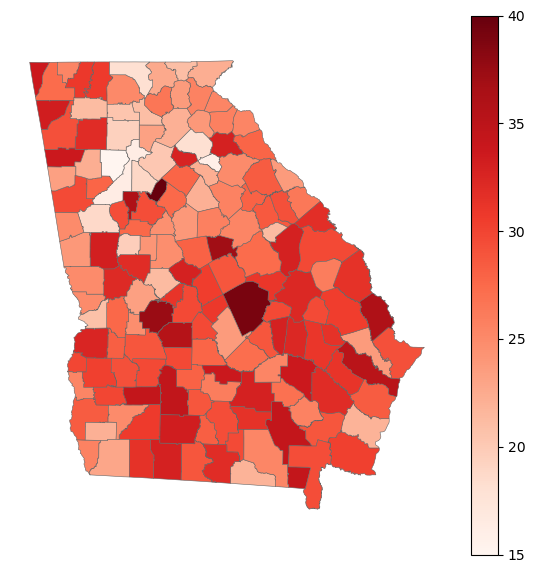

In [9]:
# Kendall's Visual Block
# Merge in obesity data
# https://towardsdatascience.com/making-heat-maps-with-literal-maps-how-to-use-python-to-construct-a-chloropleth-6b65e4e33905
# https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-georgia-current-county-subdivision-state-based
# https://arc-garc.opendata.arcgis.com/datasets/dc20713282734a73abe990995de40497/explore?location=32.585400%2C-83.739077%2C7.67
# merge obesity data onto main food_security DF


food_security_pt1 = pd.merge(ga_food_security_main, ga_obesity_df, how = "inner", on=["State", "County"])
food_security_pt1.drop(columns=['FIPS_y'],inplace=True, axis=1)
food_security_pt1.rename(columns={'FIPS_x': 'FIPS'}, inplace=True)

# import geopandas library 
import geopandas as gpd

# read in the counties map for Georgia
ga_map = gpd.read_file("data/Counties_Georgia.shp")

# Concatenating the state and county columns to create a matching FIPS columm
ga_map["FIPS"] =ga_map["STATEFP10"].map(str) +ga_map["COUNTYFP10"]

# Cast the FIPS column as an int to merge with the larger DF
ga_map["FIPS"]=ga_map["FIPS"].astype(int)

# Merge the map and obesity DFs on the FIPS column
food_obesity_map = pd.merge(ga_map, food_security_pt1, how = "inner", on=["FIPS"])

# set figure size of map
fig, ax = plt.subplots(1, figsize=(7, 7))
plt.xticks(rotation=90)

# plot out adult obesity by county using a heat map
food_obesity_map.plot(column="Adult Obesity (2018)", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=15, vmax=40))
bar_info._A = []
cbar = fig.colorbar(bar_info)
ax.axis("off")

# food_security_pt1.head()
# Adult Obesity (2018)

(-85.84785650094572, -80.50874518040483, 30.123517603473765, 35.23291089827498)

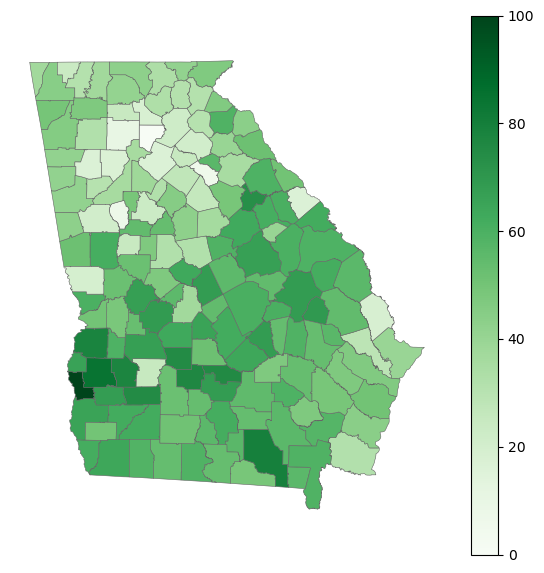

In [10]:
# Kendall's Visual Block 1
# set figure size of map
fig, ax = plt.subplots(1, figsize=(7, 7))
plt.xticks(rotation=90)

# plot out adult obesity by county using a heat map
food_obesity_map.plot(column="Food_Insecurity_Rate", cmap="Greens", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=100))
bar_info._A = []
cbar = fig.colorbar(bar_info)
ax.axis("off")



In [11]:
# Kendall's Visual Block 2

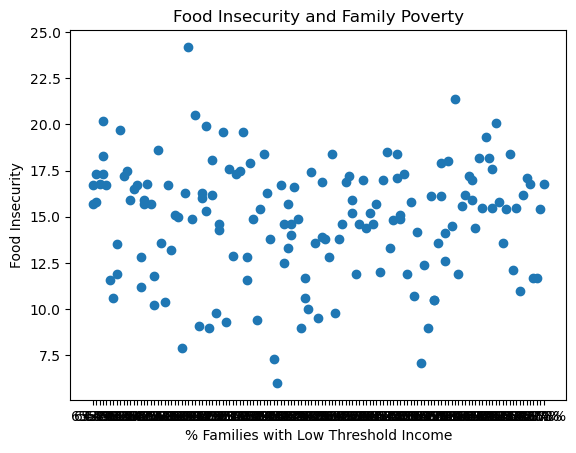

In [12]:
# Bobby's Visual Block
low_threshold_income_rate = ga_food_security_main["%_FI_≤_Low_Threshold"]
food_insecurity_rate = ga_food_security_main["Food_Insecurity_Rate"]

plt.scatter(low_threshold_income_rate,food_insecurity_rate)
plt.xlabel('% Families with Low Threshold Income')
plt.ylabel('Food Insecurity')
plt.title('Food Insecurity and Family Poverty')
plt.show()

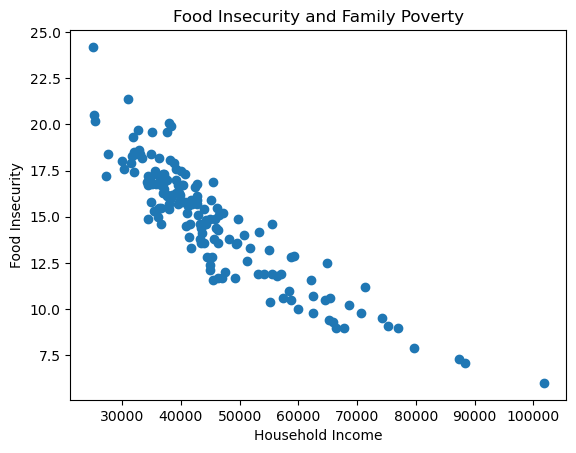

In [13]:
# Bobby's Visual Block 1 
hh_income = ga_food_security_main["Median_HH_income"]

plt.scatter(hh_income,food_insecurity_rate)
plt.xlabel('Household Income')
plt.ylabel('Food Insecurity')
plt.title('Food Insecurity and Family Poverty')
plt.show()

In [14]:
# Bobby's Visual Block 2